In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

import ELPH_utils
import ELPH_Dim_Reducer

from RedDimApprox import RedDimApprox

In [11]:
runs = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=90.npz')

# runs = runs[:100:1]
# for k in range(len(runs)):
#     runs[k] = runs[k][:,::2]

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 90


In [106]:
# dim_reducer = ELPH_Dim_Reducer.SVD()
# dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=True, orthogonalize=True, train_rdim=40)

model = RedDimApprox(runs, dim_reducer)
model.train()
print(dim_reducer.sample_max)

print(model.get_error(runs[9], rdim=40, norm='std'))

7.954117937430623
0.002983207004661441


In [5]:
dim_reducer = ELPH_Dim_Reducer.SVD()
# dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
# dim_reducer = ELPH_Dim_Reducer.Hermite(sample_max = 1.856, sorted=True, optimize=True, orthogonalize=True, train_rdim=20)

model = RedDimApprox(dim_reducer=dim_reducer)

train_kwargs = {}
score_kwargs = {'norm':'std', 'rdim':20}

m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs=train_kwargs, score_kwargs=score_kwargs)

print(m)
print(s)

0.0009632163960250765
[0.001012285427423478, 0.0009207733257847391, 0.0009684348374303605, 0.0009739141599583961, 0.0009406742295284086]


In [36]:
norm = 'std'
threshold = 0.01

# n_kmax_ar = [220,230]
# n_kmax_ar = [10,20,30,40,50,60,70,80,90,100,110,120,130,140]
n_kmax_ar = np.arange(10,235,10)

rdim_buffer = 5
previous_min_rdim = 1 + rdim_buffer
min_rdim_ar = []

for k, n_kmax in enumerate(n_kmax_ar):
    runs = ELPH_utils.load_runs(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax='+str(n_kmax)+'.npz')
    n_runs = len(runs)
    assert n_kmax == runs[0].shape[0]
    
    print(n_runs, 'loaded with n_kmax =', n_kmax)
    
    for rdim in range(previous_min_rdim-rdim_buffer,n_kmax+1):
        
#         dim_reducer = ELPH_Dim_Reducer.SVD()
#         dim_reducer = ELPH_Dim_Reducer.FFT(sorted=True)
        dim_reducer = ELPH_Dim_Reducer.Hermite(sorted=True, optimize=True, orthogonalize=True, train_rdim=rdim)
        
        model = RedDimApprox(dim_reducer=dim_reducer)
        
        score_kwargs = {'norm':norm, 'rdim':rdim}
        m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=10, seed=817, train_kwargs={}, score_kwargs=score_kwargs)
#         print('rdim:', rdim, 'mean score', m)
        std = np.std(s)
    
        score = m+std
        
        if score < threshold:
            previous_min_rdim = rdim
            min_rdim_ar.append(rdim)
            print('min rdim:', rdim, 'mean + std', score)
            break
            
    if m > threshold:        
        min_rdim_ar.append(rdim)
        print('max rdim reached:', rdim, 'mean score', m)
    

1000 loaded with n_kmax = 10
min rdim: 7 mean + std 0.00616413317820622
1000 loaded with n_kmax = 20
min rdim: 10 mean + std 0.009720804133032432
1000 loaded with n_kmax = 30


incl/ELPH_Dim_Reducer.py:110: RuntimeWarning: divide by zero encountered in true_divide
  Q[k] = Q[k] / np.linalg.norm(Q[k])
incl/ELPH_Dim_Reducer.py:110: RuntimeWarning: invalid value encountered in true_divide
  Q[k] = Q[k] / np.linalg.norm(Q[k])


min rdim: 11 mean + std 0.009226870693650632
1000 loaded with n_kmax = 40
min rdim: 12 mean + std 0.009676286947055966
1000 loaded with n_kmax = 50
min rdim: 12 mean + std 0.009969540515177117
1000 loaded with n_kmax = 60
min rdim: 13 mean + std 0.008623625858661343
1000 loaded with n_kmax = 70
min rdim: 13 mean + std 0.009529665726510792
1000 loaded with n_kmax = 80
min rdim: 13 mean + std 0.009553936386633145
1000 loaded with n_kmax = 90
min rdim: 13 mean + std 0.0094948399083222
1000 loaded with n_kmax = 100
min rdim: 13 mean + std 0.009363386260270595
1000 loaded with n_kmax = 110
min rdim: 13 mean + std 0.009420017106904259
1000 loaded with n_kmax = 120


incl/ELPH_Dim_Reducer.py:140: RuntimeWarning: invalid value encountered in multiply
  self.H_matrix[k] = eval_hermite(k,x_test) * np.exp(-0.5*x_test**2) / np.sqrt(np.sqrt(np.pi)*(2**k)*np.math.factorial(k))


min rdim: 13 mean + std 0.00957838853467391
1000 loaded with n_kmax = 130
min rdim: 13 mean + std 0.009472205128959523
1000 loaded with n_kmax = 140
min rdim: 13 mean + std 0.009600031541731422
1000 loaded with n_kmax = 150
min rdim: 13 mean + std 0.00964146432855386
1000 loaded with n_kmax = 160
min rdim: 13 mean + std 0.009594877171393535
1000 loaded with n_kmax = 170


incl/ELPH_Dim_Reducer.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.H_matrix[k] = eval_hermite(k,x_test) * np.exp(-0.5*x_test**2) / np.sqrt(np.sqrt(np.pi)*(2**k)*np.math.factorial(k))


min rdim: 13 mean + std 0.009603268364441527
1000 loaded with n_kmax = 180


OverflowError: int too large to convert to float

(23, 2)
[[ 10   9]
 [ 20  15]
 [ 30  19]
 [ 40  23]
 [ 50  24]
 [ 60  25]
 [ 70  27]
 [ 80  26]
 [ 90  28]
 [100  28]
 [110  28]
 [120  29]
 [130  29]
 [140  29]
 [150  29]
 [160  31]
 [170  30]
 [180  29]
 [190  30]
 [200  31]
 [210  30]
 [220  32]
 [230  31]]


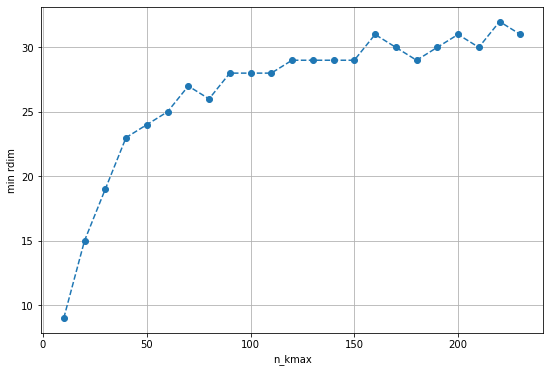

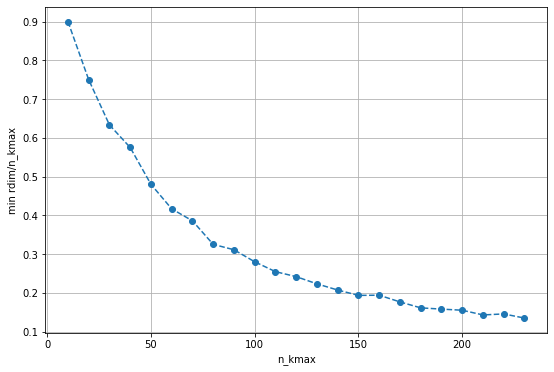

In [35]:
n_kmax_ar = np.asarray(n_kmax_ar)
min_rdim_ar = np.asarray(min_rdim_ar)

data = np.stack((n_kmax_ar,min_rdim_ar),axis=1)

# prev_data = np.loadtxt('/home/agluedge/Preprints/ELPH/figs/red_dim_apprx/svd_std')

# data = np.concatenate((prev_data,data),axis=0)


print(data.shape)
print(data)

# np.savetxt('/home/agluedge/Preprints/ELPH/figs/red_dim_apprx/svd_max', data)



plt.grid()
plt.plot(data[:,0],data[:,1], '--', marker='o')
plt.xlabel('n_kmax')
plt.ylabel('min rdim')
plt.show()


plt.grid()
plt.plot(data[:,0],data[:,1]/data[:,0], '--', marker='o')
plt.xlabel('n_kmax')
plt.ylabel('min rdim/n_kmax')
plt.show()